In [222]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,precision_score,hamming_loss,precision_recall_curve
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

from sklearn.pipeline import Pipeline
from sklearn.kernel_approximation import RBFSampler,Nystroem
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import seaborn as sns
import regex as re

In [3]:
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [4]:
path = "F:/kaggle/titanic"

In [260]:
df = pd.read_csv(path+"/train.csv") 

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The features `ticket` and `cabin` can’t add much value to our analysis. drop them

In [8]:
df = df.drop(['Ticket','Cabin'], axis=1)
df = df.dropna() 

### Let's take a Look at our data graphically:

In [18]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# plot of survivde vs not
ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")    

#plot with age
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

#class wise distribtn
ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

#afe with in class
plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

#different boarding locations
ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location")
plt.show()

Text(0.5,1,'Passengers per boarding location')

survived by gender

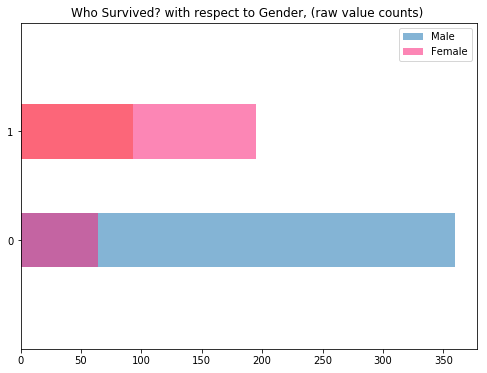

In [25]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 


plt.show()

In [78]:
def precision_recall_proba(y_test,y_scores,threshold,name,figure_num):
    precision, recall, probabs = precision_recall_curve(y_test, y_scores)
    closest_o_point_5 = np.argmin(np.abs(probabs-0.5)) #probab which is very closest to 0.5
    closest_to_thresh = np.argmin(np.abs(probabs-threshold))
    print('closest point to 0.5 threshold is',"{0:.2f}".format(probabs[closest_o_point_5]),'\n',
          'closest point to optimal threshold {0:.2f} is{0:.2f}'.format(threshold, closest_to_thresh))
#     closest_o_point_5 = 0.5 #probab which is very closest to 0.5
    
    closest_to_thresh_p = precision[closest_to_thresh]
    closest_to_thresh_r = recall[closest_to_thresh]
    closest_o_point_5_p = precision[closest_o_point_5]
#     print(closest_o_point_5_p,'\n')
    closest_o_point_5_r = recall[closest_o_point_5]
    plt.figure(figure_num)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Pre-Rec Curve proba'+name)
    plt.plot(closest_o_point_5_p, closest_o_point_5_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.plot(closest_to_thresh_p, closest_to_thresh_r, 'x', markersize = 12, fillstyle = 'none', c='b')
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    return

In [79]:
def best_thres_f1(y_test,proba):
    proba1 = proba[:,1]
    maxt = np.round(proba1.max(),decimals=1)
    mint = np.round(proba1.min(),decimals =1)
    num = (maxt+0.1-mint)/0.1
    t = np.linspace(maxt,mint,num)
#     f1scores = [[0,0]]*num
    f1score = -1
    bestt = 0.5
    for i in t:
        temp = f1_score(y_test,(proba1>i).astype(int))
        if temp>f1score:
            bestt = i
            f1score = temp
    return bestt

The features SibSp and Parch capture the number of parents / children / siblings that the passengers have travelled with. Let’s combine them both to engineer a new feature called as 'relatives'

In [261]:
resultdf = pd.read_csv(path+'/test.csv')
data = [df, resultdf]

In [262]:
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

C:\Users\sudhe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


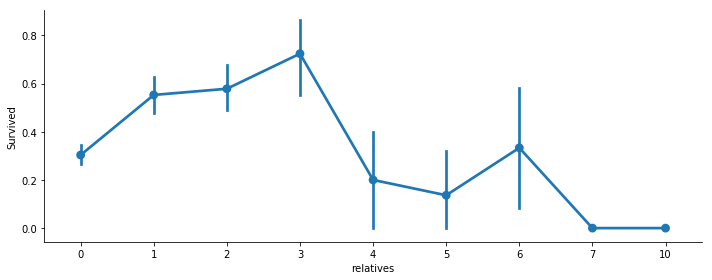

In [263]:
axes = sns.factorplot('relatives','Survived', 
                      data=df, aspect = 2.5, );

In [264]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(df['Fare'].median())

for dataset in data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)


In [265]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [266]:
for dataset in data:
    dataset['Title'] = dataset['Name'].apply(get_title)
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [267]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,S,1,No,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,C,1,No,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,S,0,Yes,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,S,1,No,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,S,0,Yes,1


In [268]:
resultdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,Title
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,Q,0,Yes,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0,NaN,S,1,No,3
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,Q,0,Yes,1
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,1,NaN,S,0,Yes,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,S,2,No,3


In [269]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [270]:
resultdf['Embarked'] = resultdf['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [271]:
# for dataset in data:
#     dataset['Embarked'].fillna('S',inplace=True)
#     dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [272]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
df = df.drop(drop_elements, axis = 1)
resultdf  = resultdf.drop(drop_elements, axis = 1)

In [273]:
df['travelled_alone'] = df['travelled_alone'].map({'Yes':1 , 'No':0}).astype(int)
resultdf['travelled_alone'] = resultdf['travelled_alone'].map({'Yes':1 , 'No':0}).astype(int)

In [274]:
# for dataset in data:
#     dataset['travelled_alone'] = dataset['travelled_alone'].map({'Yes':0 , 'No':1}).astype(int)

In [275]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,relatives,travelled_alone,Title
0,0,3,1,1,0,0,0,1,0,1
1,1,1,0,2,0,3,1,1,0,3
2,1,3,0,1,0,1,0,0,1,4
3,1,1,0,2,0,3,0,1,0,3
4,0,3,1,2,0,1,0,0,1,1


visualize the co-relation between sample features.

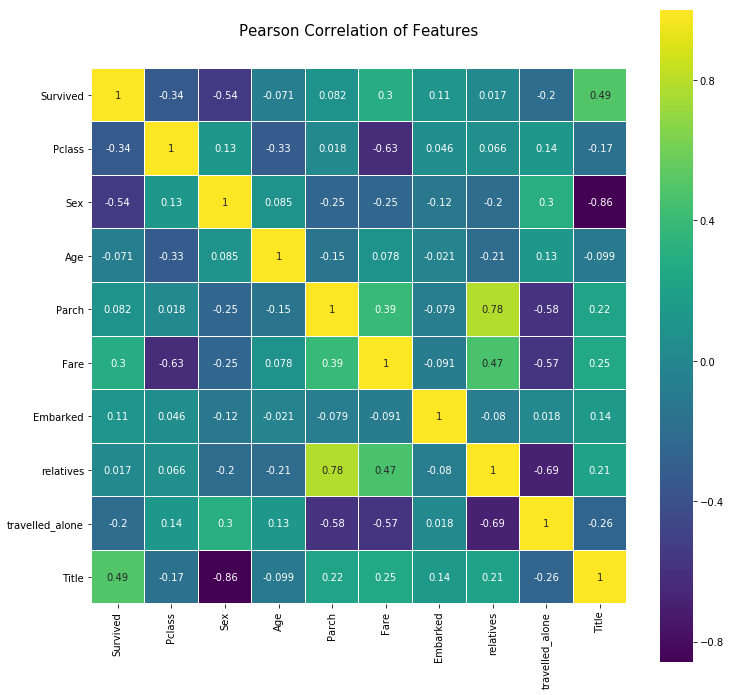

In [276]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [277]:

df[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])
# Since "Survived" is a binary class (0 or 1), these metrics grouped by the Title feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived

# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}


Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.575000    40   23
3      0.793651   126  100
4      0.702703   185  130
5      0.347826    23    8

In [278]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])
# Since Survived is a binary feature, this metrics grouped by the Sex feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived
    
# sex_mapping = {{'female': 0, 'male': 1}}

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

In [279]:
y = df['Survived']
x = df.drop(columns = ['Survived'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [280]:
train_numerical_features = list(x_train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
x_train_ss = pd.DataFrame(data = x_train)
x_train_ss[train_numerical_features] = ss_scaler.fit_transform(x_train_ss[train_numerical_features])

x_train = x_train_ss

In [281]:
train_numerical_features = list(x_test.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
x_test_ss = pd.DataFrame(data = x_test)
x_test_ss[train_numerical_features] = ss_scaler.fit_transform(x_test_ss[train_numerical_features])

x_test = x_test_ss

In [283]:
train_numerical_features = list(resultdf.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
resultdf_ss = pd.DataFrame(data = resultdf)
resultdf_ss[train_numerical_features] = ss_scaler.fit_transform(resultdf_ss[train_numerical_features])

resultdf = resultdf_ss

In [284]:
# y = df['Survived']
# x = df.drop(columns = ['Survived'])

In [285]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [286]:
logclf = LogisticRegression(solver='sag')
svmlinclf = svm.SVC(kernel='linear',probability=True,gamma='auto')
svmlinclf1 = svm.SVC(kernel='linear',probability=True,gamma='auto',class_weight = {0:1,1:1.5})
svmrbfclf = svm.SVC(kernel='rbf',probability =True,gamma='auto')
svmrbfclf1 = svm.SVC(kernel='rbf',probability=True,gamma='auto',class_weight = {0:1,1:1.5})
decTreeclf = DecisionTreeClassifier(max_depth = 5)
randomforclf = RandomForestClassifier(n_estimators=10,max_features=3, random_state=0)
XGBclf = XGBClassifier()

In [287]:
logclf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

0.776536312849162 0.7142857142857144 0.6944444444444444 0.7352941176470589
closest point to 0.5 threshold is 0.50 
 closest point to optimal threshold 0.30 is0.30


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


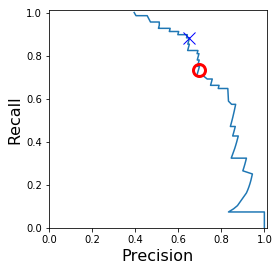

In [288]:
predictionslog = logclf.predict(x_test)

print(accuracy_score(predictionslog,y_test),f1_score(predictionslog,y_test),recall_score(predictionslog,y_test),precision_score(predictionslog,y_test))

proba_log = logclf.predict_proba(x_test)

best_t = best_thres_f1(y_test,proba_log)

best_t

precision_recall_proba(y_test,proba_log[:,1],best_t,'ha',1)

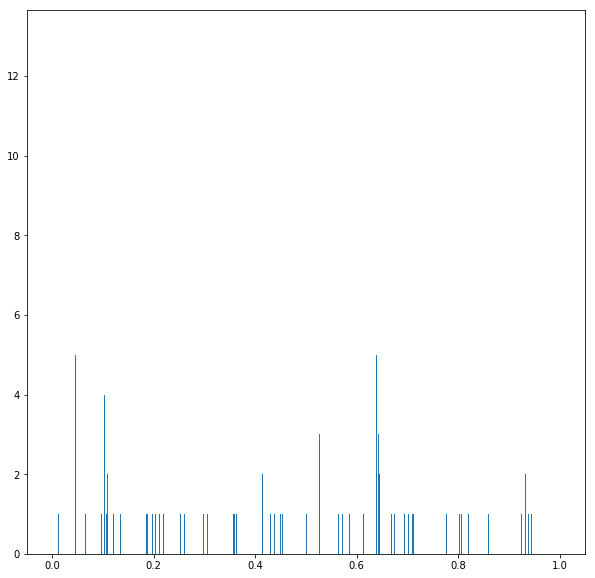

In [289]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(proba_log[:,1],bins)
plt.show()

In [290]:
svmlinclf.fit(x_train,y_train)

predictionssvmlin = svmlinclf.predict(x_test)

print(accuracy_score(predictionssvmlin,y_test),f1_score(predictionssvmlin,y_test),recall_score(predictionssvmlin,y_test),precision_score(predictionssvmlin,y_test))

0.776536312849162 0.7101449275362319 0.7 0.7205882352941176


In [291]:
probasvmlin = svmlinclf.predict_proba(x_test)

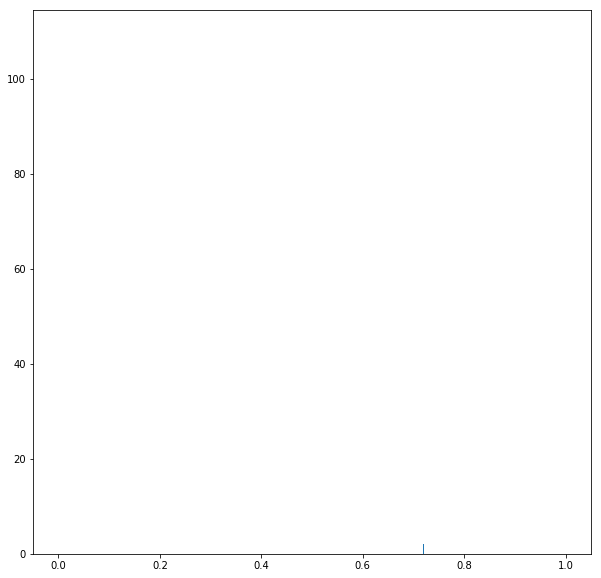

In [292]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(probasvmlin[:,1],bins)
plt.show()

0.7
closest point to 0.5 threshold is 0.72 
 closest point to optimal threshold 0.70 is0.70


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


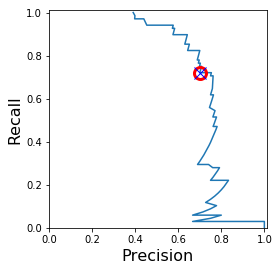

In [293]:
best_t_svmlin = best_thres_f1(y_test,probasvmlin)

print(best_t_svmlin)

precision_recall_proba(y_test,probasvmlin[:,1],best_t_svmlin,'ha',1)

In [294]:
svmlinclf1.fit(x_train,y_train)
predictionlinclf1 = svmlinclf1.predict(x_test)
print(accuracy_score(predictionlinclf1,y_test),f1_score(predictionlinclf1,y_test),recall_score(predictionlinclf1,y_test),precision_score(predictionlinclf1,y_test))

0.776536312849162 0.7101449275362319 0.7 0.7205882352941176


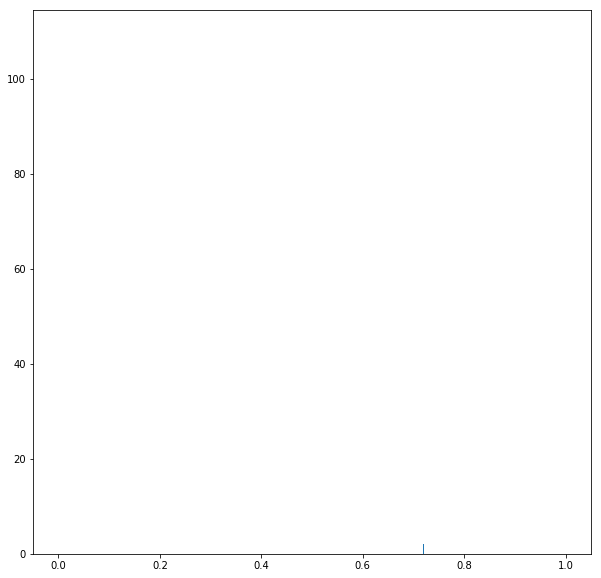

C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


0.7
closest point to 0.5 threshold is 0.72 
 closest point to optimal threshold 0.70 is0.70


C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


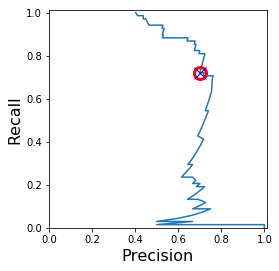

In [295]:
probasvmlin1 = svmlinclf1.predict_proba(x_test)

bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(probasvmlin1[:,1],bins)
plt.show()

best_t_svmlin1 = best_thres_f1(y_test,probasvmlin1)

print(best_t_svmlin1)

precision_recall_proba(y_test,probasvmlin1[:,1],best_t_svmlin1,'ha',1)

In [296]:
svmrbfclf.fit(x_train,y_train)

predictionsrbf = svmrbfclf.predict(x_test)

print(accuracy_score(predictionsrbf,y_test),f1_score(predictionsrbf,y_test),recall_score(predictionsrbf,y_test),precision_score(predictionsrbf,y_test))

0.8491620111731844 0.7906976744186046 0.8360655737704918 0.75


0.6
closest point to 0.5 threshold is 0.50 
 closest point to optimal threshold 0.60 is0.60


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


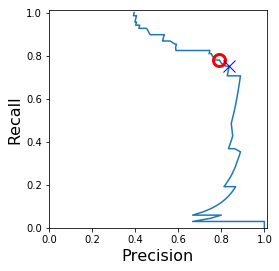

In [297]:
probasvmrbf = svmrbfclf.predict_proba(x_test)

best_t_svmrbf = best_thres_f1(y_test,probasvmrbf)

print(best_t_svmrbf)

precision_recall_proba(y_test,probasvmrbf[:,1],best_t_svmrbf,'ha',1)

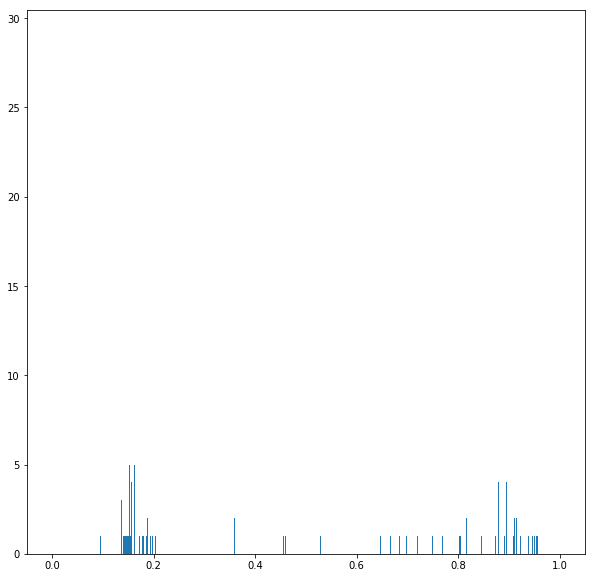

In [298]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(probasvmrbf[:,1],bins)
plt.show()

0.8324022346368715 0.7887323943661971 0.7567567567567568 0.8235294117647058
0.6
closest point to 0.5 threshold is 0.50 
 closest point to optimal threshold 0.60 is0.60


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


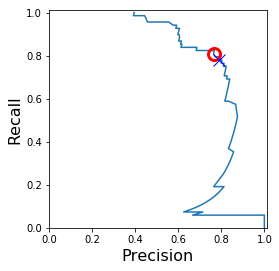

In [299]:
svmrbfclf1.fit(x_train,y_train)

predictionsrbf = svmrbfclf1.predict(x_test)

print(accuracy_score(predictionsrbf,y_test),f1_score(predictionsrbf,y_test),recall_score(predictionsrbf,y_test),precision_score(predictionsrbf,y_test))

probasvmrbf1 = svmrbfclf1.predict_proba(x_test)

best_t_svmrbf = best_thres_f1(y_test,probasvmrbf1)

print(best_t_svmrbf)

precision_recall_proba(y_test,probasvmrbf1[:,1],best_t_svmrbf,'ha',1)

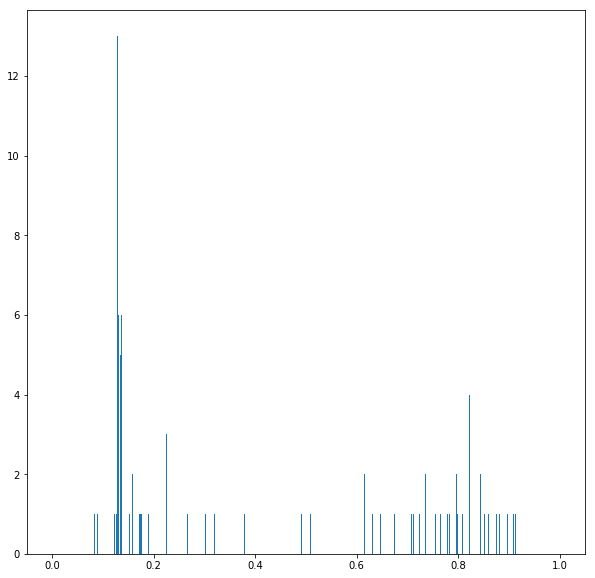

In [300]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(probasvmrbf1[:,1],bins)
plt.show()


In [301]:
randomforclf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [302]:
proba_random = randomforclf.predict_proba(x_test)
pred_random = randomforclf.predict(x_test)

0.29999999999999993
closest point to 0.5 threshold is 0.51 
 closest point to optimal threshold 0.30 is0.30


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


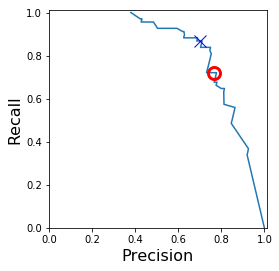

In [303]:
best_t_randomf = best_thres_f1(y_test,proba_random)

print(best_t_randomf)

precision_recall_proba(y_test,proba_random[:,1],best_t_randomf,'ha',1)

In [304]:
print(accuracy_score(pred_random,y_test),f1_score(pred_random,y_test),recall_score(pred_random,y_test),precision_score(pred_random,y_test))


0.8100558659217877 0.7424242424242423 0.765625 0.7205882352941176


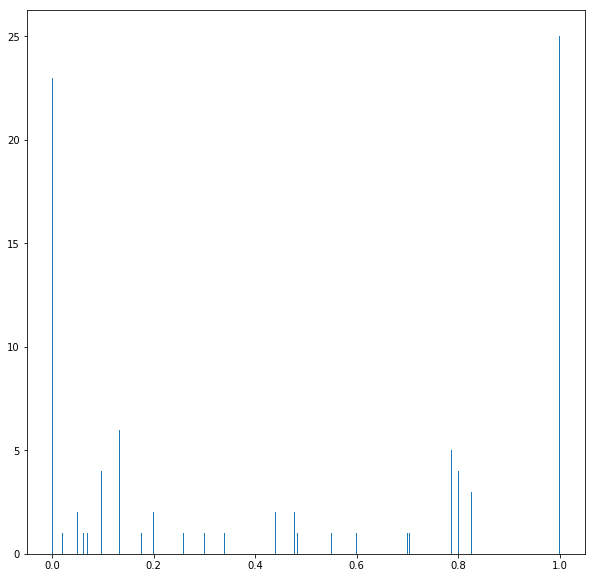

In [305]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(proba_random[:,1],bins)
plt.show()


In [306]:
decTreeclf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [307]:
proba_dectree = decTreeclf.predict_proba(x_test)
pred_dectree = decTreeclf.predict(x_test)

0.29999999999999993
closest point to 0.5 threshold is 0.44 
 closest point to optimal threshold 0.30 is0.30


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


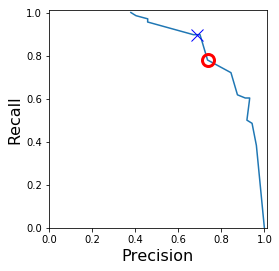

In [308]:
best_t_dectreef = best_thres_f1(y_test,proba_dectree)
print(best_t_dectreef)
precision_recall_proba(y_test,proba_dectree[:,1],best_t_dectreef,'ha',1)

In [309]:
print(accuracy_score(pred_dectree,y_test),f1_score(pred_dectree,y_test),recall_score(pred_dectree,y_test),precision_score(pred_dectree,y_test))

0.8435754189944135 0.7777777777777778 0.8448275862068966 0.7205882352941176


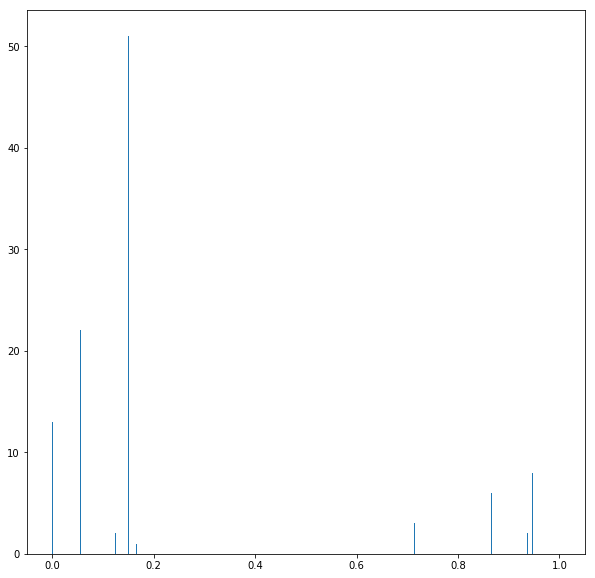

In [310]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(proba_dectree[:,1],bins)
plt.show()


In [311]:
XGBclf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [312]:
proba_xgb = XGBclf.predict_proba(x_test)
predict_xgb = XGBclf.predict(x_test)

C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.29999999999999993
closest point to 0.5 threshold is 0.50 
 closest point to optimal threshold 0.30 is0.30


C:\Users\sudhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sudhe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


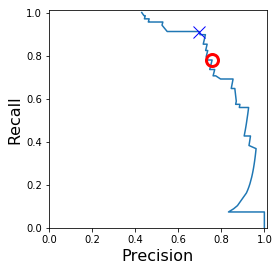

In [313]:
best_t_xgb = best_thres_f1(y_test,proba_xgb)
print(best_t_xgb)
precision_recall_proba(y_test,proba_xgb[:,1],best_t_xgb,'ha',1)

In [314]:
print(accuracy_score(predict_xgb,y_test),f1_score(predict_xgb,y_test),recall_score(predict_xgb,y_test),precision_score(predict_xgb,y_test))

0.8156424581005587 0.759124087591241 0.7536231884057971 0.7647058823529411


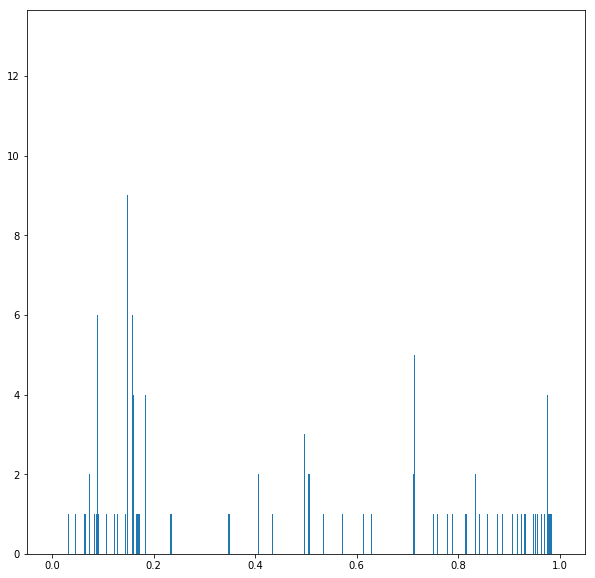

In [315]:
bins = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,10))
plt.hist(proba_xgb[:,1],bins)
plt.show()


In [317]:
cv = KFold(n_splits=5)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(resultdf))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
#     tree_model =RandomForestClassifier(max_features= 4,n_estimators=10)
    tree_model = DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] # Extract train data with cv indices
        f_valid = df.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
accu_df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
accu_df = accu_df[["Max Depth", "Average Accuracy"]]
print(accu_df.to_string(index=False))

Max Depth  Average Accuracy
        1          0.778909
        2          0.787898
        3          0.828253
        4          0.827136
        5          0.818185
        6          0.815956
        7          0.815937
        8          0.804720
        9          0.808079


In [319]:
dumdf = pd.read_csv(path+'/test.csv')

In [320]:
dumdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [321]:
dumdf.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [322]:
resultdf['PassengerId'] = dumdf['PassengerId']

In [324]:
resultdf.drop(['PassengerId'],axis = 1, inplace=True)

In [326]:
dumdf['Survived'] = decTreeclf.predict(resultdf)

In [333]:
dumdf[['PassengerId','Survived']].to_csv('results1dectree.csv',index = False)

In [332]:
# dumdf.to_csv('chec.csv')

In [334]:
dumdf['Survived'] = randomforclf.predict(resultdf)
dumdf[['PassengerId','Survived']].to_csv('results1rand.csv',index = False)